# Sử dụng Pandas và Seaborn thực hiện phân tích EDA cho dữ liệu bán hàng (supermarket_sales_vn.csv)

Đơn biến (phân tích trên 1 cột):
* Số đơn: so sánh tổng đơn theo chi nhánh, nhóm hàng, giới tính khách hàng, phương thức thanh toán (cột Payment)

In [47]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
raw_data= pd.read_csv(r'C:\Users\Hoanpc.TSTDESK01\Desktop\Python\B4\data\supermarket_sales_vn.csv')

In [4]:
raw_data.loc[:,['City']].astype(str)
total = raw_data.loc[:,['City','Customer type','Gender','Payment','Total']]
# total_city.reset_index(level=0, inplace=True)

In [5]:
#Make copy of Total columns
copy_1 = total['Total'].copy().to_frame()
# Make category
copy_1.mask(copy_1<=100,1,inplace=True)
copy_1.mask((copy_1<=200) & (copy_1>100),2,inplace=True)
copy_1.mask((copy_1<=400) & (copy_1>200),3,inplace=True)
copy_1.mask((copy_1<=600) & (copy_1>400),4,inplace=True)
copy_1.mask((copy_1<=800) & (copy_1>600),5,inplace=True)
copy_1.mask(copy_1>800,6,inplace=True)
sort = copy_1.replace({1:'<100',2:'100-200',3:'200-400',4:'400-600',5:'600-800',6:'>800'})
sort.columns = ['Sort']
copy_1.columns = ['index']
# Add categorized columns to total_city
total_cat = total.join(sort).join(copy_1)
total_city_count = total_cat.groupby(['City','index','Sort']).count().reset_index().loc[:,['City','index','Sort','Total']]
total_city_count

,City,index,Sort,Total
0,Hà Nội,1.0,<100,58
1,Hà Nội,2.0,100-200,53
2,Hà Nội,3.0,200-400,80
3,Hà Nội,4.0,400-600,43
4,Hà Nội,5.0,600-800,31
5,Hà Nội,6.0,>800,9
6,TP HCM,1.0,<100,101
7,TP HCM,2.0,100-200,94
8,TP HCM,3.0,200-400,131
9,TP HCM,4.0,400-600,83


Về cơ bản, TP HCM có sức mua lớn nhất về cả số lượng lẫn giá trị đơn hàng; tiếp đến là HN và cuối cùng là Đà Nẵng


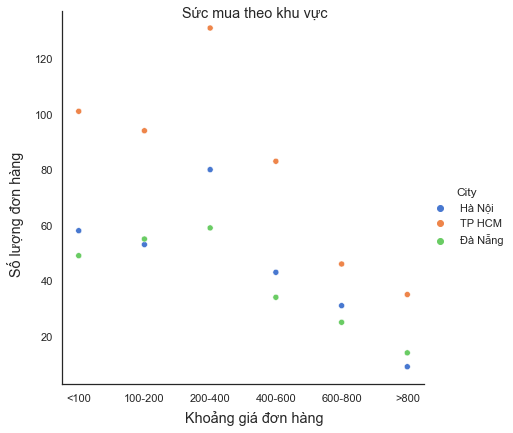

In [17]:
sb.set_theme(style='white')
g = sb.relplot(x='Sort',y='Total', hue='City', sizes=(1000, 400), palette='muted', height=6, data=total_city_count)
g.fig.suptitle('Sức mua theo khu vực')
g.fig.supylabel('Số lượng đơn hàng')
g.fig.supxlabel('Khoảng giá đơn hàng')
g.set(xlabel=None)
g.set(ylabel=None)
print('Về cơ bản, TP HCM có sức mua lớn nhất về cả số lượng lẫn giá trị đơn hàng; tiếp đến là HN và cuối cùng là Đà Nẵng')

Về cơ bản, chủ yếu là thành viên member sẽ mua nhiều hơn so với thành viên normal, còn thành viên normal chủ yếu mua nhiều hơn so với member ở đơn hàng từ 100-400 - tập trung giá bình dân


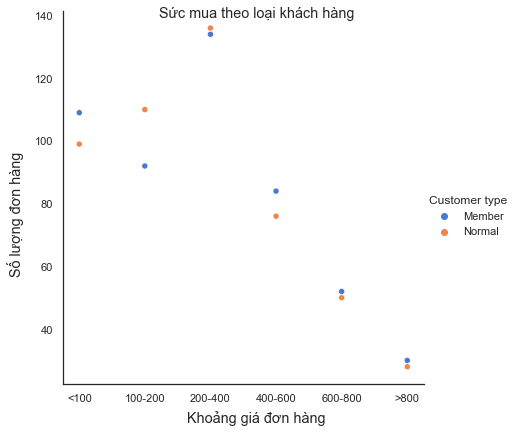

In [22]:
total_cus_count = total_cat.groupby(['Customer type','index','Sort']).count().reset_index().loc[:,['Customer type','index','Sort','Total']]
sb.set_theme(style='white')
g = sb.relplot(x='Sort',y='Total', hue='Customer type', sizes=(1000, 400), palette='muted', height=6, data=total_cus_count)
g.fig.suptitle('Sức mua theo loại khách hàng')
g.fig.supylabel('Số lượng đơn hàng')
g.fig.supxlabel('Khoảng giá đơn hàng')
g.set(xlabel=None)
g.set(ylabel=None)
print('Về cơ bản, chủ yếu là thành viên member sẽ mua nhiều hơn so với thành viên normal, còn thành viên normal chủ yếu mua nhiều hơn so với member ở đơn hàng từ 100-400 - tập trung giá bình dân')

Về cơ bản, dưới 200 nghìn thì nam giới mua nhiều, khoảng giá 200-600 thì nữ giới mua vượt trội, còn lại khá tương đồng giữa nam và nữ. Với mức giá cao, nữ giới chịu đầu tư mua sắm hơn


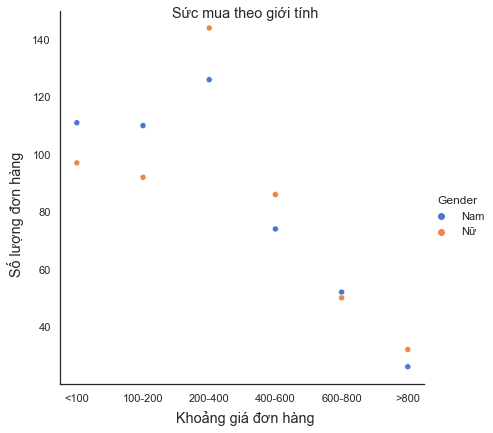

In [23]:
total_gen_count = total_cat.groupby(['Gender','index','Sort']).count().reset_index().loc[:,['Gender','index','Sort','Total']]
sb.set_theme(style='white')
g = sb.relplot(x='Sort',y='Total', hue='Gender', sizes=(1000, 400), palette='muted', height=6, data=total_gen_count)
g.fig.suptitle('Sức mua theo giới tính')
g.fig.supylabel('Số lượng đơn hàng')
g.fig.supxlabel('Khoảng giá đơn hàng')
g.set(xlabel=None)
g.set(ylabel=None)
print('Về cơ bản, dưới 200 nghìn thì nam giới mua nhiều, khoảng giá 200-600 thì nữ giới mua vượt trội, còn lại khá tương đồng giữa nam và nữ. Với mức giá cao, nữ giới chịu đầu tư mua sắm hơn')

Về cơ bản, dưới 100 nghìn, 200-400 và 600-800 nghìn chủ yếu thanh toán bằng tiền mặt, từ 100-200 thanh toán bằng thẻ credit card, từ 800 nghìn trở lên thanh toán bằng ví điện tử


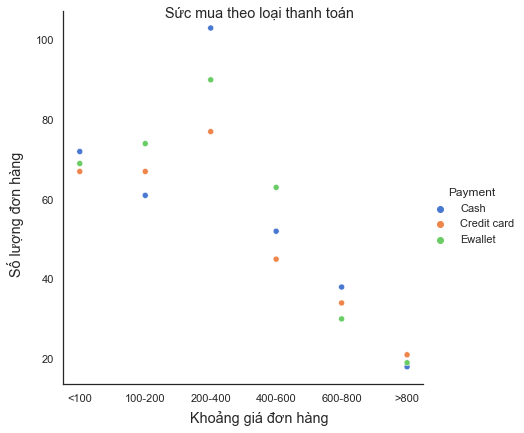

In [24]:
total_pay_count = total_cat.groupby(['Payment','index','Sort']).count().reset_index().loc[:,['Payment','index','Sort','Total']]
sb.set_theme(style='white')
g = sb.relplot(x='Sort',y='Total', hue='Payment', sizes=(1000, 400), palette='muted', height=6, data=total_pay_count)
g.fig.suptitle('Sức mua theo loại thanh toán')
g.fig.supylabel('Số lượng đơn hàng')
g.fig.supxlabel('Khoảng giá đơn hàng')
g.set(xlabel=None)
g.set(ylabel=None)
print('Về cơ bản, dưới 100 nghìn, 200-400 và 600-800 nghìn chủ yếu thanh toán bằng tiền mặt, từ 100-200 thanh toán bằng thẻ credit card, từ 800 nghìn trở lên thanh toán bằng ví điện tử')

* Mỗi đơn hàng có một số mặt hàng, vẽ phân bố số lượng đơn theo số mặt hàng 
(chẳng hạn các đơn hàng có 1,2,3... mặt hàng có số đơn là bao nhiêu?)

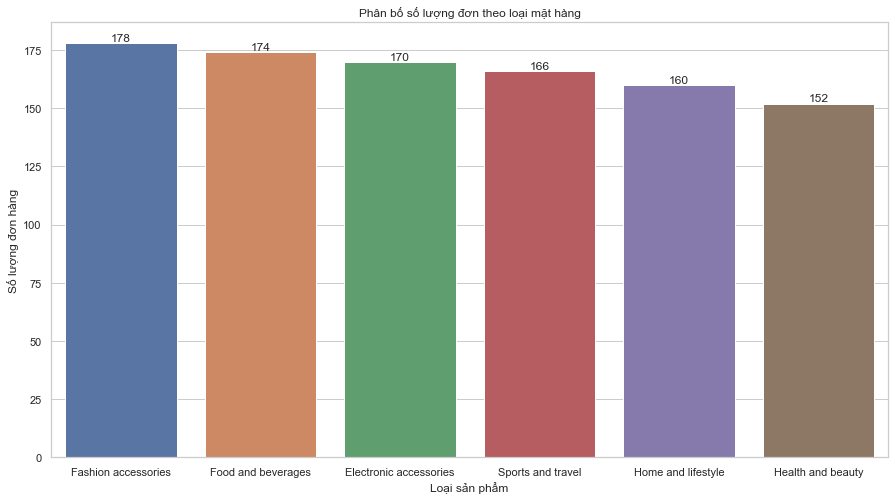

In [42]:
group_prd = raw_data['Product line'].value_counts().reset_index()
group_prd.columns = ['product','count']
sb.set(rc = {'figure.figsize':(15,8)})
sb.set_theme(style="whitegrid")
ax = sb.barplot(x='product', y='count', data=group_prd)
ax.set_title('Phân bố số lượng đơn theo loại mặt hàng')
ax.set_ylabel('Số lượng đơn hàng')
ax.set_xlabel('Loại sản phẩm')
ax.bar_label(ax.containers[0])
plt.show()

* Thời gian: ngày nào bận rộn nhất tuần? thời điểm nào bận rộn nhất trong ngày?

In [60]:
dow = raw_data['Date'].astype(np.datetime64).dt.dayofweek.to_frame().value_counts()
hour = raw_data['Time'].astype(np.datetime64).dt.hour.to_frame().value_counts()
print(dow)
print('Thứ tự bận rộn là thứ 7 - thứ 3 - thứ 4 - thứ 5 - chủ nhật - thứ 2')
print(hour)
print('Bận rộn nhất là khung giờ sau 7h tối và trước 8h tối, sau đến 1h-3h chiều và 10h-11h sáng, thấp sau cùng là 8h-9h tối và 5h-6h chiều')

Date
5       164
1       158
2       143
4       139
3       138
6       133
0       125
dtype: int64
Thứ tự bận rộn là thứ 7 - thứ 3 - thứ 4 - thứ 5 - chủ nhật - thứ 2
Time
19      113
13      103
15      102
10      101
18       93
11       90
12       89
14       83
16       77
20       75
17       74
dtype: int64
Bận rộn nhất là khung giờ sau 7h tối và trước 8h tối, sau đến 1h-3h chiều và 10h-11h sáng, thấp sau cùng là 8h-9h tối và 5h-6h chiều


# Đa biến (cần kết hợp 2 hay nhiều cột)

* Doanh thu: tỷ lệ tổng doanh thu theo chi nhánh, nhóm hàng, giới tính khách hàng

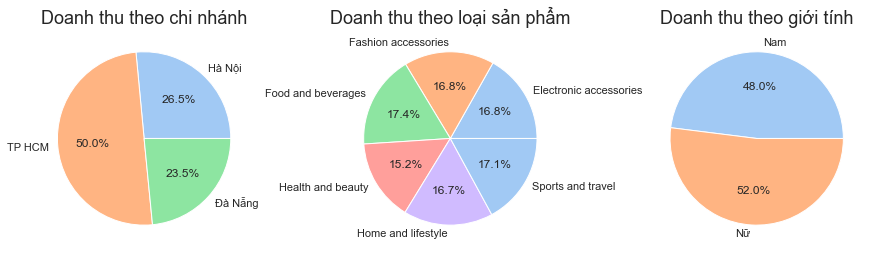

In [84]:
total_city_sum = raw_data.groupby(['City']).sum().reset_index().loc[:,['City','Total']]
total_prd_sum = raw_data.groupby(['Product line']).sum().reset_index().loc[:,['Product line','Total']]
total_gen_sum = raw_data.groupby(['Gender']).sum().reset_index().loc[:,['Gender','Total']]
#define Seaborn color palette to use
colors = sb.color_palette('pastel')[0:5]
#create pie chart
fig, ax = plt.subplots(1, 3,figsize=(12,30), constrained_layout=True)
# Khu vực
ax[0].pie(total_city_sum['Total'], labels = total_city_sum['City'], colors = colors, autopct='%.1f%%')
ax[0].set_title('Doanh thu theo chi nhánh',fontsize=18)
# Sản phẩm
ax[1].pie(total_prd_sum['Total'], labels = total_prd_sum['Product line'], colors = colors, autopct='%.1f%%')
ax[1].set_title('Doanh thu theo loại sản phẩm',fontsize=18)
#
ax[2].pie(total_gen_sum['Total'], labels = total_gen_sum['Gender'], colors = colors, autopct='%.1f%%')
ax[2].set_title('Doanh thu theo giới tính',fontsize=18)
plt.show()

In [71]:
raw_data

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating
0,750-67-8428,Hà Nội,Member,Nữ,Health and beauty,74.69,7,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,9.1
1,226-31-3081,TP HCM,Normal,Nữ,Electronic accessories,15.28,5,3.8200,80.2200,3/8/19,10:29,Cash,76.40,9.6
2,631-41-3108,Hà Nội,Normal,Nam,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,7.4
3,123-19-1176,Hà Nội,Member,Nam,Health and beauty,58.22,8,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,8.4
4,373-73-7910,Hà Nội,Normal,Nam,Sports and travel,86.31,7,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,TP HCM,Normal,Nam,Health and beauty,40.35,1,2.0175,42.3675,1/29/19,13:46,Ewallet,40.35,6.2
996,303-96-2227,Đà Nẵng,Normal,Nữ,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/19,17:16,Ewallet,973.80,4.4
997,727-02-1313,TP HCM,Member,Nam,Food and beverages,31.84,1,1.5920,33.4320,2/9/19,13:22,Cash,31.84,7.7
998,347-56-2442,Hà Nội,Normal,Nam,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/19,15:33,Cash,65.82,4.1
